## 1. IMDB 데이터셋 로드
- Internet Movie Database 인터넷 영화 데이터베이스인 IMDB 는 긍정, 부정의 영화 리뷰가 labelling 되어있는 데이터 입니다. 텍스트를 기반으로 영화 리뷰를 긍정, 부정으로 classification 해보는 예제 입니다.
- IMDB 는 각 단어가 사전을 기반으로 숫자로 전처리가 완료되어 있는 데이터 입니다.
- train_data 25,000개, test_data 25,000 개로 구성되어 있습니다.
- label 의 1은 긍정, 0은 부정을 나타냅니다.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (25000,)
Test data shape: (25000,)


In [13]:
print("첫번째 데이터", train_data[0])
print("첫번째 데이터의 모양", len(train_data[0]))
print("첫번째 label", train_labels[0])

첫번째 데이터 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 데이터의 모양 218
첫번째 label 1


### 각 숫자의 의미 살펴보기
- imdb dataset 의 index가 어떤 단어를 의미하는지 살펴봅니다.

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 2. Data Preparation
- 신경망에 적합한 Tensor 형태로 Data 를 변형합니다.

- Feature data

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
len(x_train[0])

10000

- label data

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. Modeling
- 16개의 node로 구성된 Dense Layer 2개
- 출력층

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## 4. Validation
- 10000 개의 데이터 샘플을 Train set 에서 떼어 Validation 을 위한 데이터셋으로 정합니다.

In [0]:
x_validation = x_train[:10000]
partial_x_train = x_train[10000:]

y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

## 5. Training
- 512개의 mini-batch, 20 Epochs

In [21]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_validation, y_validation))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.5083 - acc: 0.7818 - val_loss: 0.3795 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.3003 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2179 - acc: 0.9281 - val_loss: 0.3078 - val_acc: 0.8721
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1749 - acc: 0.9437 - val_loss: 0.2838 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1425 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1149 - acc: 0.9652 - val_loss: 0.3136 - val_acc: 0.8783
Epoch 7/20
15000/15000 [==============================] - 2s 164us/step - 

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 6. Training, Validation loss & accuracy Plot
- Overfitting 된 것을 확인 할 수 있다.

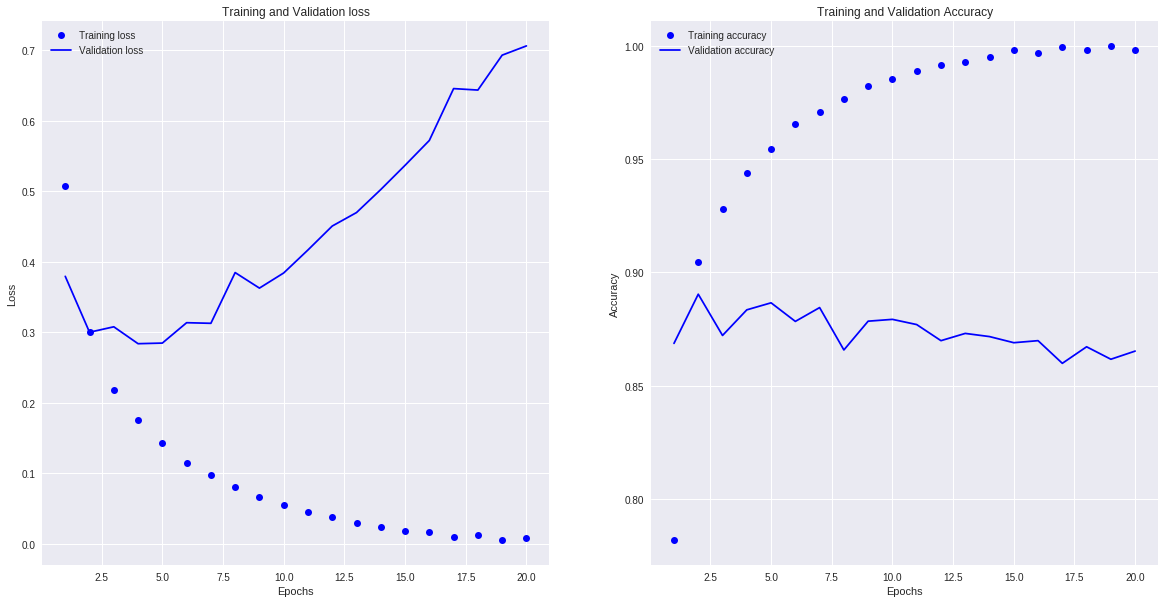

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Epoch 선택
- Overfitting 되기 직전까지의 Model 을 선택하겠습니다.
- 5 Epoch 까지 Training 된 것을 모델로 선택해 보겠습니다.

- 87%의 정확도 달성!!!

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 6s 221us/step - loss: 0.4738 - acc: 0.8213
Epoch 2/4
25000/25000 [==============================] - 3s 119us/step - loss: 0.2673 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.2032 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 2s 79us/step


[0.31136418705940244, 0.87608]

In [31]:
model.predict(x_test)

array([[0.16458476],
       [0.99984694],
       [0.40221703],
       ...,
       [0.08059275],
       [0.04919389],
       [0.46421233]], dtype=float32)

## 8. 추가 실험

1. hidden layer 3개

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.5078 - acc: 0.7815 - val_loss: 0.3838 - val_acc: 0.8563
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2858 - acc: 0.9071 - val_loss: 0.3126 - val_acc: 0.8765
Epoch 3/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.2086 - acc: 0.9293 - val_loss: 0.3192 - val_acc: 0.8705
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1630 - acc: 0.9451 - val_loss: 0.2806 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1273 - acc: 0.9578 - val_loss: 0.2954 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1069 - acc: 0.9658 - val_loss: 0.3285 - val_acc: 0.8799
Epoch 7/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.0864 - acc: 0.9751 - val_loss: 0.3348 - 

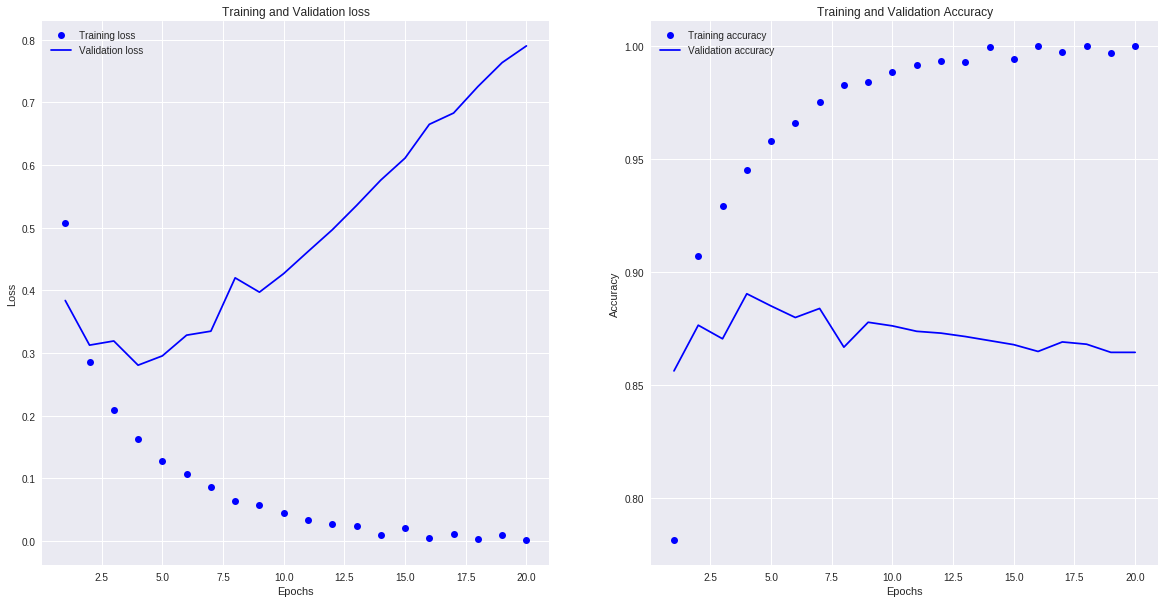

In [33]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_validation, y_validation))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.4586 - acc: 0.8196
Epoch 2/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.2540 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.1949 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 3s 103us/step


[0.31698271841049197, 0.87768]